## 6. GLMの応用範囲を広げる
### 6.1 さまざまな種類のデータで応用できるGLM
GLMの特徴は、確率分布・リンク関数・線形予測子の組み合わせを指定することで、様々なタイプのデータを表現できる。


|確率分布|乱数生成|family指定|リンク関数|link指定|
|-|-|-|-|-|
|離散|二項分布|binom|Binomial()|ロジット|logit|
|離散|ポアソン分布|poisson|Poisson()|ログ|log|
|離散|負の二項分布|nbinom|NegativeBinomial()|ログ|log|
|連続|ガンマ分布|gamma()|Gamma()|ログ|log|
|連続|正規分布|norm()|Gaussian()|恒等リンク|identity|


### 6.2 上限のあるカウントデータ
ここでは、二項分布を使ったGLMについて説明する。  
二項分布は、上限のあるカウントデータ、例えば応答変数が$y\in\{0,1,2,\cdots,N \}$といった範囲をとる現象のばらつきを表すために使う。  
  
架空植物のデータを例に説明する。  
ある架空植物の個体$i$それぞれにおいて  
「$N_i$個の観察植物のうち生きていて発芽能力があるものは$y_i$個、死んだ種子は$N=y_i$個」といった観察データが得られたとする。  
100個体調べたとして、観察種子数$N_i$はどの個体でも8個とする。  
応答変数である生存種子数の取りうる値は$y\in\{0,1,\cdots,8 \}$となり、全部生存していた場合は$y_i=8$で、全種子が死亡していたら$y_i=0$となる。  
ここで、**生存確率**は「ある個体$i$から得られた1個の種子が生きている確率」として考える。  
このときの生存確率を$q_i$とする。

In [3]:
import pandas as pd

d = pd.read_csv('C:/Users/tanak/study/参考書/データ解析のための統計モデリング/kubobook_2012/binomial/data4a.csv')
d.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [4]:
d.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

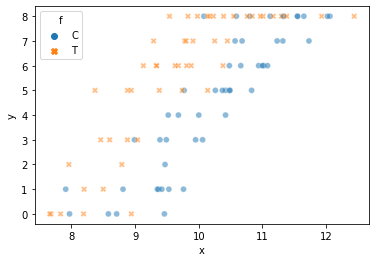

In [20]:
import seaborn as sns

sns.scatterplot('x', 'y', style='f', hue='f', alpha=0.5, data=d)

- 体サイズ$x_i$が大きくなると生存種子数$y_i$が多くなる
- 肥料をやると($f_i=T$)生存種子数$y_i$が多くなる
ことが分かる。

### 6.3 二項分布で表現する「あり・なし」カウントデータ
「$N$個のうち$y$個が生存していた」といった構造のカウントデータを統計モデルで表すときには**二項分布**がよく使われる。  
二項分布の確率分布は、
$$
p(y|N,q)=\begin{pmatrix}
N\\
y
\end{pmatrix}
q^y(1-q)^{N-y}
$$

で定義され、$N$個中の$y$個で事象が生起する確率である。  

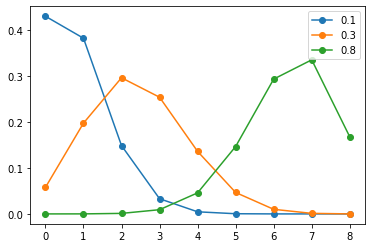

In [45]:
from scipy.stats import binom
import matplotlib.pyplot as plt

x = np.arange(0, 9)

for p in [0.1, 0.3, 0.8]:
    plt.plot(x, binom.pmf(k=x, n=8, p=p), '-o', label=str(p));
plt.legend();

### 6.4 ロジスティック回帰とロジットリンク関数
**ロジスティック回帰**は、二項分布を使ったGLMのひとつである。  
#### ロジットリンク関数
ロジスティック回帰では、確率分布は二項分布、リンク関数に**ロジットリンク関数**を指定する。  
ここで、**ロジスティック関数**を説明する。  
ロジスティック関数は、
$$
q_i=logistic(z_i)=\frac{1}{1+\exp{(-z_i)}}
$$

で表され、変数$z_i$は、線形予測子$z_i=\beta_1+\beta_2x_i+\cdots$である。

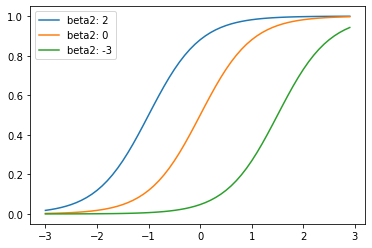

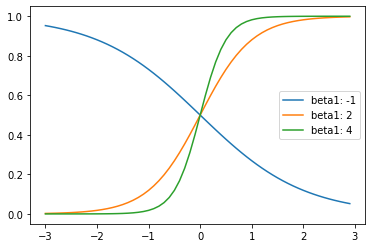

In [59]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-3, 3, 0.1)

z1 = lambda b: b + 2*x
z2 = lambda b: 0 + b*x

for b in [2, 0, -3]:
    plt.plot(x, logistic(z1(b)), label="beta2: "+str(b));
plt.legend();
plt.show()

for b in [-1, 2, 4]:
    plt.plot(x, logistic(z2(b)), label="beta1: "+str(b));
plt.legend();
plt.show()

線形予測子がどのような値をとっても$0\leq q_i \leq 1$となる。  
  
このロジスティック関数を変形すると、
$$
\log{\frac{q_i}{1-q_i}}=z_i
$$

となる。  
この左辺を**ロジット関数**と呼ぶ。
$$
logit(q_i)=\log{\frac{q_i}{1-q_i}}
$$

ロジット関数は、ロジスティック関数の逆関数である。

#### パラメータ推定
尤度関数
$$
L(\{\beta_j\})=\prod_i\begin{pmatrix}
N_i\\
y_i
\end{pmatrix}
q_i^{y_i}(1-q_i)^{N_i-y_i}
$$

から、対数尤度関数
$$
\log{L(\{\beta_j\})}=\sum_i\biggl\{\log{\begin{pmatrix}
N_i\\
y_i
\end{pmatrix}}
y_i\log{q_i}+(N_i-y_i)\log{(1-q_i)}\biggr\}
$$

が得られ、この$\log{L}$を最大にする推定値のセット$\{\beta_j\}$を探し出すのが最尤推定である。  


In [282]:
import statsmodels.formula.api as smf

# 応答変数は(生存数, 死亡数)であり、I()を使って表現
model = smf.glm(formula='y + I(N - y) ~ x + f', data=d, family=sm.families.Binomial())
results = model.fit(disp=0)

PatsyError: Error evaluating factor: NameError: name 'N' is not defined
    y + I(N - y) ~ x
        ^^^^^^^^

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Tue, 19 Oct 2021   Deviance:                       123.03
Time:                        17:50:43   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.000       1.568       2.475
x              1.9524      0.139     14.059      0.000       1.680       2.225
==============================================================================
"""

In [117]:
z3 = lambda x: results.params[0] + results.params[2] * x

x = np.arange(0, 9)

binom_hist = []
xpoint = np.array([8.5, 10, 12])
for xi in xpoint:
    binom_hist.append(binom.pmf(k=x, n=8, p=logistic(z3(xi))))

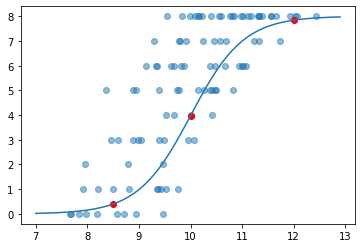

In [119]:
plt.scatter(d.x, d.y, alpha=0.5);
plt.plot(np.arange(7,13,0.1), logistic(z3(np.arange(7,13,0.1)))*8);
plt.scatter(xpoint, logistic(z3(xpoint))*8, color='red');

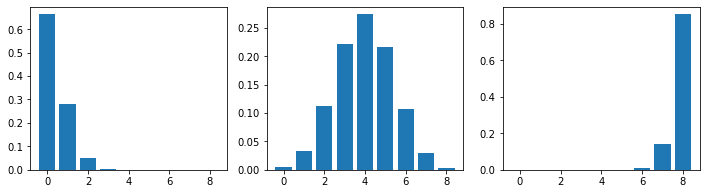

In [125]:
fig ,axes = plt.subplots(nrows=1, ncols=3, figsize=(4*3, 3))

for i in range(3):
    axes[i].bar(x=x, height=binom_hist[i]);

#### ロジット関数の意味・解釈
ロジット関数は、
$$
logit(q_i)=\log{\frac{q_i}{1-q_i}}
$$

であり、
これが線形予測子に等しいので、
$$
\begin{align}
\frac{q_i}{1-q_i}&=\exp{(\beta_1+\beta_2x_i+\beta_3f_i)}\\
&=\exp{(\beta_1)}\exp{(\beta_2x_i)}\exp{(\beta_3f_i)}
\end{align}
$$

この左辺は**オッズ**と呼ばれる量で、(生存する確率)/(生存しない確率)という比となる。  
今回計算された推定値を代入し、定数($\exp{(-19.5)}$)を省略すると、
$$
\frac{q_i}{1-q_i}\propto \exp{(1.95x_i)}\exp{(2.02f_i)}
$$

という関係となる。  
個体$i$の大きさが「1単位」増大したときの生存確率のオッズの変化は、
$$
\begin{align}
\frac{q_i}{1-q_i} &\propto \exp{(1.95(x_i+1))}\exp{(2.02f_i)}\\
&\propto \exp{(1.95x_i)}\exp{(1.95)}\exp{(2.02f_i)}
\end{align}
$$

とかけるので、生存オッズは$\exp{(1.95)}$倍になる。

#### ロジスティック回帰のモデル選択
AICを使ってモデルの選択を行う。

In [157]:
xf = 'y + I(N - y) ~ x + f'
x = 'y + I(N - y) ~ x '
f = 'y + I(N - y) ~ f '
null = 'y + I(N - y) ~ 1 '

models = [null, f, x, xf]

In [179]:
df_summury = pd.DataFrame([])
model_name = ["一定", "f", "x", "x+f"]
K = [1, 2, 2, 3]
for i, (mdl, k) in enumerate(zip(model_name, K)):
    model = smf.glm(formula=models[i], data=d, family=sm.families.Binomial()).fit(disp=0)
    
    df = pd.DataFrame({"model": mdl,
                       "k": k,
                       "logL": [model.llf],
                       "-2logL": [-2*model.llf],
                       "residual Deviance": [model.deviance],
                       "AIC": [model.aic]})
    df_summury = pd.concat([df_summury,df])

In [180]:
df_summury

,model,k,logL,-2logL,residual Deviance,AIC
0,一定,1,-321.204671,642.409342,499.232103,644.409342
0,f,2,-316.879877,633.759753,490.582514,637.759753
0,x,2,-180.172722,360.345443,217.168204,364.345443
0,x+f,3,-133.105565,266.211129,123.033890,272.211129


x+fモデルがAICの観点から最良となった。

#### 6.5 交互作用項の入った線形予測子
ここまで使ってきた線形予測子に、**交互作用項**を追加する。  
$$
logit(q_i)=\beta_1+\beta_2x_i+\beta_3f_i+\beta_4x_if_i
$$

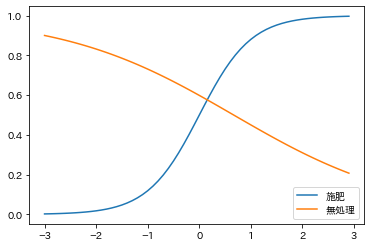

In [212]:
import japanize_matplotlib

def logistic(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-3, 3, 0.1)

t = 2*x
c = -0.4*x+0.4*1-0.4*0.5*x

for b, name in zip([t, c], ["施肥","無処理"]):
    plt.plot(x, logistic(b), label=name);
plt.legend();
plt.show();

In [219]:
model2 = smf.glm(formula='y + I(N - y) ~ x + f + x*f', data=d, family=sm.families.Binomial()).fit(disp=0)
print("AIC:", model2.aic)
model2.summary()

AIC: 273.61059672597395


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Wed, 20 Oct 2021   Deviance:                       122.43
Time:                        07:34:09   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
f[T.T]        -0.0638      2.704     -0.024      0.981      -5.363       5.235
x              1.8525      0.186      9.983      0.000       1.489       2.216
x:f[T.T]       0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

施肥処理をしなかった場合は、  
$$
logut(q_i)=-18.5+1.85x_i
$$

となり、施肥処理をした場合は、
$$
logut(q_i)=-18.5-0.0638+(1.85+0.216)x_i=-18.6+2.07x_i
$$

となり、あまり変わらない。  
また、AICは交互作用項を入れることで274に悪化している。

### 6.6 オフセット項
別の架空データを使用する。  
- 調査地100か所($i\in\{1,2,\cdots,100\}$)
- 調査地$i$ごとに面積$A_i$が異なる
- 調査地$i$における植物個体数$y_i$を記録
- (目的)調査地$i$における植物個体の「人口密度」か「明るさ」$x_i$にどう影響されているかを知る

ここでいう人口密度とは、個体数/面積といった単位面積当たりの個体数である。  
しかし、オフセット項を利用することで個体数と面積を割り算してこの数量を用意する必要はない。  
面積$A_i$である調査地$i$における人口密度は、
$$
\frac{平均個体数\lambda_i}{A_i}=人口密度
$$

指数関数と明るさ$x_i$依存性を組み合わせ、
$$
\lambda_i=A_i×人口密度=A_i\exp{\beta_1+\beta_2}
$$
これを変形すると、
$$
\lambda_i=\exp{\beta_1+\beta_2+\log{A_i}}
$$

となり、$z_i=\beta_1+\beta_2+\log{A_i}$を線形予測子とする対数リンク関数・ポアソン分布のGLMとなる。  
このように線形予測子の中で係数のつかない$\log{A_i}$のような項は、**オフセット項**と呼ぶ。

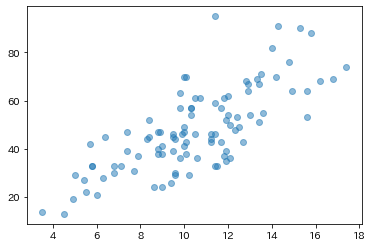

In [223]:
data2 = pd.read_csv('C:/Users/tanak/study/参考書/データ解析のための統計モデリング/kubobook_2012/binomial/data4b.csv')

plt.scatter(data2.A, data2.y, alpha=.5);

In [227]:
model_offset = smf.glm(formula='y  ~ x', offset=np.log(data2.A), data=data2, family=sm.families.Poisson()).fit(disp=0)
print("AIC:", model_offset.aic)
model_offset.summary()

AIC: 650.3405865842104


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Wed, 20 Oct 2021   Deviance:                       81.608
Time:                        07:58:13   Pearson chi2:                     81.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

In [237]:
mdl_predict = lambda x, A: np.exp(model_offset.params[0]+model_offset.params[1]*x+np.log(A))
a = np.arange(1, 20)

オフセット項を使うことで、個体数平均は調査地の面積$A_i$に比例するといった家庭を反映させつつ明るさ$x_i$の効果を推定できる。  

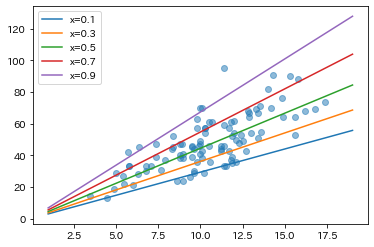

In [244]:
plt.scatter(data2.A, data2.y, alpha=.5);
for x in np.arange(0.1,1.1, 0.2):
    plt.plot(a, mdl_predict(x, a), label="x="+str(np.round(x, 2)));
plt.legend();

### 6.7 正規分布とその尤度
正規分布は連続値のデータを統計モデルで扱うための確率分布である。**ガウス分布**とも呼ばれる。  
パラメータとして、平均$\mu$と標準偏差$\sigma$を持つ。  
数式表現は、
$$
p(y|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\bigl\{-\frac{(y-\mu)^2}{2\sigma^2} \bigr\}}
$$

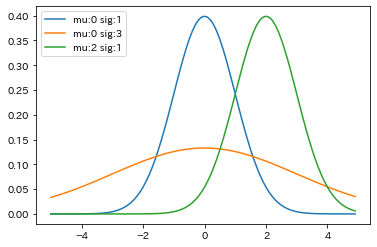

In [258]:
from scipy.stats import norm

x = np.arange(-5, 5, 0.1)

for mu, sig in zip([0, 0, 2], [1, 3, 1]):
    n = norm.pdf(x, mu, sig)
    plt.plot(x, n, label="mu:"+str(mu)+" sig:"+str(sig));
plt.legend();

確率=確率密度×$\Delta y$に基づく、正規分布の最尤推定を考える。  
ある$y_i$が$y_i-0.5\Delta y \leq y_i \leq y_i+0.5\Delta y$である確率は、確率密度関数$p(y_i|\mu,\sigma)$と区間$\Delta y$の積であると近似できるので尤度関数は、
$$
\begin{align}
L(\mu,\sigma)&=\prod_ip(y_i|\mu,\sigma)\Delta y\\
&=\prod_i\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\bigl\{-\frac{(y_i-\mu)^2}{2\sigma^2} \bigr\}}\Delta y
\end{align}
$$

となり、対数尤度関数は、
$$
\log{L}(\mu,\sigma)=-0.5N\log{(2\pi\sigma^2)}-\frac{1}{2\sigma^2}\sum_i(y_i-\mu)^2+N\log{(\Delta y)}
$$

となる。  
定数部分は影響を与えないので、省略して書くと以下のようになる。
$$
\log{L}(\mu,\sigma)=-0.5N\log{(2\pi\sigma^2)}-\frac{1}{2\sigma^2}\sum_i(y_i-\mu)^2
$$

この正規分布の最尤推定は、最小二乗法による推定と等しくなる。

### 6.8 ガンマ分布のGLM
ガンマ分布は確率変数の取りうる範囲が0以上の連続確率分布である。  
確率密度関数は、
$$
p(y|s,r)=\frac{r^s}{\Gamma(s)}y^{s-1}\exp{(-ry)}
$$

と定義され、$s$はshapeパラメータ、$r$はrateパラメータと呼ばれる。  
$\Gamma(s)$はガンマ関数である。  
平均は$s/r$、分散は$s/r^2$となる。$s=1$のときは**指数分布**になる。

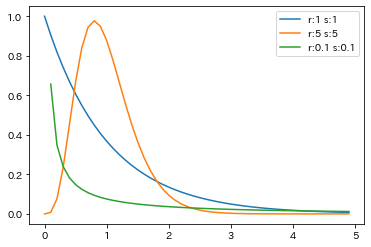

In [271]:
from scipy.stats import gamma

x = np.arange(0, 5, 0.1)

for r, s in zip([1, 5, 0.1], [1, 5, 0.1]):
    n = gamma.pdf(x, r, scale=1/s)
    plt.plot(x, n, label="r:"+str(r)+" s:"+str(s));
plt.legend();

架空データを使用する。  
架空植物50個体の葉の重量と花の重量の関係を調べる。  
個体$i$の葉重量を$x_i$、花重量を$y_i$とする。

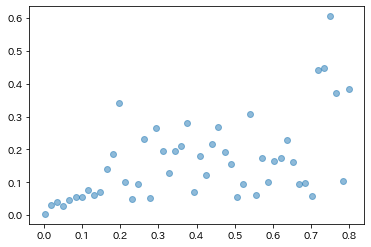

In [267]:
d = pd.read_csv('C:/Users/tanak/study/参考書/データ解析のための統計モデリング/kubobook_2012/gamma/data.csv')

plt.scatter(d.x, d.y, alpha=.5);

ある個体$i$の花の重量$y_i$が平均$\mu_i$のガンマ分布に従っていることにする。  
平均花重量$\mu_i$が葉重量$x_i$の単調増加関数であり、何らかの理由があって、
$$
\mu_i=Ax_i^b
$$
と仮定したとする。  
$A=\exp{(a)}$とおいてから、全体を指数関数でまとめると、
$$
\mu_i=\exp{(a)}x_i^b=\exp{(a+b\log{x_i})}
$$

この両辺の対数を取ると、
$$
\log{\mu_i}=a+b\log{x_i}
$$

線形予測子$a+b\log{x_i}$と対数リンク関数を使って平均$\mu_i$が与えられた。

In [277]:
model_gamma = smf.glm(formula='y  ~ np.log(x)', data=d, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print("AIC:", model_gamma.aic)
model_gamma.summary()

AIC: -120.84911914017121


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.32713
Method:                          IRLS   Log-Likelihood:                 62.425
Date:                Wed, 20 Oct 2021   Deviance:                       15.761
Time:                        10:59:56   Pearson chi2:                     15.7
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1621      0.119     -9.754      0.000      -1.396      -0.929
np.log(x)      0.6258      0.069      9.123      0.000       0.491       0.760
==============================================================================
"""

In [278]:
pred_gamma = lambda x: np.exp(model_gamma.params[0]+model_gamma.params[1]*np.log(x))

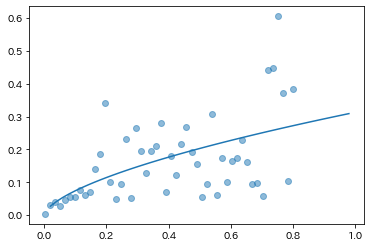

In [281]:
x = np.arange(0.02, 1, 0.02)

plt.scatter(d.x, d.y, alpha=.5);
plt.plot(x, pred_gamma(x));